# Zero to Hero

## 2.01 Optimizacion Bayesiana

In [ ]:
El objetivo es mostrar como funciona la Optimizacion Bayesiana en el caso mas simple : una funcion univariada

### Advertencia

El uso del método de Optimización Bayesiana para la optimización de hiperparámetros en modelos predictivos tiene menos de una década.
Entender los fundamentos de la O.B. requieren de una sólida formación matemática y **no** son el objetivo de esta asignatura.
Para quienes deseen aventurarse a los detalles técnicos:
* El paper original de la libreria mlrMBO (año 2018 )   https://arxiv.org/pdf/1703.03373.pdf
* El método de Kriging , tal cual se deriva del uso original, en este pequeño libro de 106 páginas "Basic Steps in Geostatistics: The Variogram and Kriging" https://www.pdfdrive.com/basic-steps-in-geostatistics-the-variogram-and-kriging-e187336318.html

### El código

In [8]:
#Ejemplo de optimizacion bayesiana, univariada

#limpio la memoria
rm( list=ls() )  #remove all objects
gc()             #garbage collection

require("data.table")
#paquetes necesarios para la Bayesian Optimization
require("DiceKriging")
require("mlrMBO")

options(repr.plot.width=20, repr.plot.height=10)


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,667968,35.7,1329767,71.1,1329767,71.1
Vcells,1320005,10.1,8388608,64.0,6891583,52.6


Loading required package: DiceKriging

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘DiceKriging’”
Loading required package: mlrMBO

Loading required package: mlr

Loading required package: ParamHelpers

Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.

Loading required package: smoof

Loading required package: checkmate



In [13]:
install.packages("DiceKriging")

Installing package into ‘/home/marcos/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)



### Defino la funcion a optimizar, un polinomio de grado 4

In [9]:
func_univariada01  <- function( x )
{
  y  <- -2 * (x+13) * (x-3) * (x-7) * (x-19)

  return( y )
}

Grafico la funcion

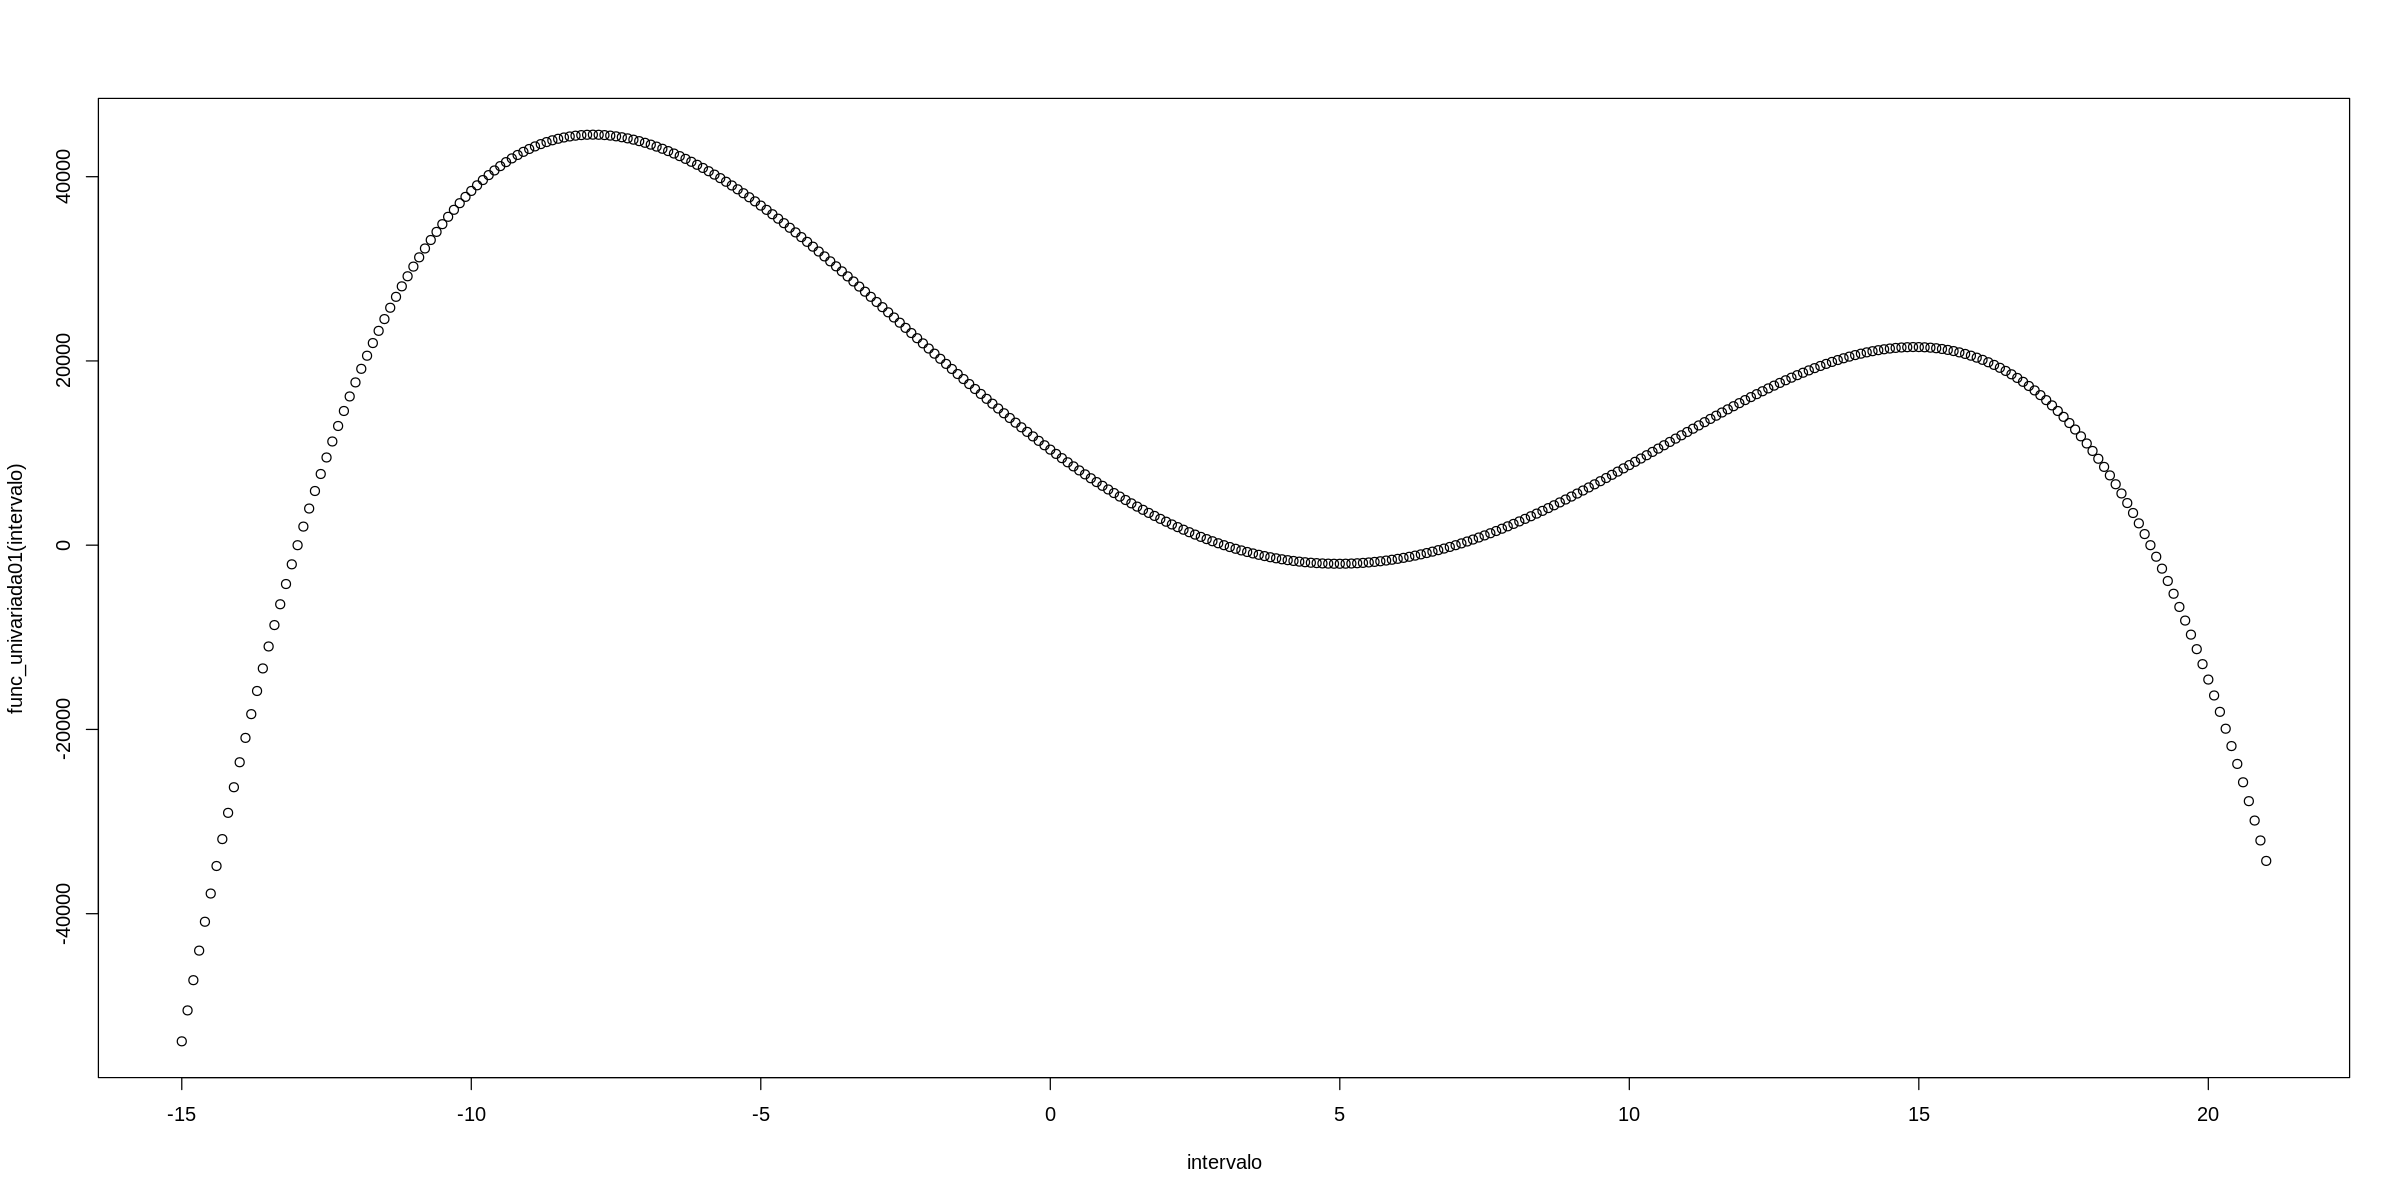

In [14]:
intervalo  <- seq(-15,21,0.1)
plot(intervalo, func_univariada01(intervalo))

La funcion tiene dos máximos, uno de ellos es el global.

### Optimizacion Bayesiana

¿Qué tan rápido encontrará la Optmización Bayesiana el máximo global?

Defino las caracteristicas de la optimizacion

* **fn**    es el nombre de la funcion
* **minimize**   por defecto es TRUE,  pero en este caso le asigno FALSE, ya que deseo maximizar  el valor
* **par.set**  indica cuales son los hiperparmetros de la funcion, en este caso hay una sola variable que llamé  x
---
* **makeNumericParam** indica que ese hiperparámetro es un numero real, una variable continua  ( no es ni un entero ni una categoria )

In [15]:
obj.fun  <- makeSingleObjectiveFunction(
              fn=       func_univariada01,
              minimize= FALSE,   #estoy Maximizando la ganancia
              par.set=  makeParamSet(  makeNumericParam( "x", lower= -100, upper=  100) ),
             )

ahora defino la funcion proxy, la que se construye internamente intentando emular la realidad

* **cl**  es la clase de learner,  "reg.km" indica el método de kriging "**reg**ression **k**riging **m**ethodd"
* **predict.type**  es el tipo de prediccion que deseo me devuelva, "se" significa que espero dos valores  media y standard error
* **covtype**    es la funcion de covarianza que se va a utilizar, cual es la covarianza de dos mediciones como fucion de la distancia entre los puntos donde fueron tomadas las mediciones, fue inventada por Bertil Matérn 

El método de kriging puede verse en su forma original (la geología) , esta presentación https://www.youtube.com/watch?v=ZB7GvJrNKq0

In [16]:
fproxy  <- makeLearner( cl= "regr.km",
                        predict.type= "se", 
                        covtype= "matern3_2" )

ultima definicion,  especificar la optimizacion bayesiana
*  **crit**   indica el criterio con el que se completan los valores iniciales "no inteligentes"
*  **iters**  indica la cantidad de iteraciones inteligentes que hará la Optimizacion Bayesiana, las que son adicionales a las primeras cuatro de este caso.*  **iters**  indica la cantidad de iteraciones inteligentes que hará la Optimizacion Bayesiana, las que son adicionales a las primeras cuatro de este caso.

In [17]:
ctrl  <- makeMBOControl()
ctrl  <- setMBOControlInfill( ctrl, crit= makeMBOInfillCritEI())
ctrl  <- setMBOControlTermination( ctrl, iters= 25 )

finalmente , lanzo la Optimizacion Bayesiana

* **fun**  es la especificacion de la funcion que deseo optimizar, si maximizo o minimizo, cuales son las variables de la misma
* **learner**  especifica cual es la función proxy interna que va a utilizar la Optimziación Bayesiana
* **control**  indica la la forma en que se harán las iteraciones

In [18]:
run  <- mbo( fun=      obj.fun, 
             learner= fproxy, 
             control= ctrl )

Computing y column(s) for design. Not provided.

[mbo] 0: x=34.6 : y = -1.3e+06 : 0.0 secs : initdesign

[mbo] 0: x=-54.5 : y = -2.15e+07 : 0.0 secs : initdesign

[mbo] 0: x=-7.79 : y = 4.45e+04 : 0.0 secs : initdesign

[mbo] 0: x=61.9 : y = -2.09e+07 : 0.0 secs : initdesign




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  232.8438 
  - best initial criterion value(s) :  -70.26479 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       70.265  |proj g|=   4.6364e-09
At iterate     1  f =       70.265  |proj g|=    4.6364e-09

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 4.63642e-09
final function value 70.2648

F = 70.2648
final  value 70.264790 
converged


[mbo] 1: x=-6.57 : y = 4.27e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  232.8438 
  - best initial criterion value(s) :  -85.33768 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       85.338  |proj g|=    0.0023279
At iterate     1  f =       85.338  |proj g|=      0.002323
At iterate     2  f =       85.336  |proj g|=    0.00012051
At iterate     3  f =       85.336  |proj g|=    6.6825e-06
At iterate     4  f =       85.336  |proj g|=    2.0749e-08

iterations 4
function evaluations 5
segments explored during Cauchy searches 4
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 2.0749e-08
final function value 85.3363

F = 85.3363
final  value 85.336339 
converge

[mbo] 2: x=17.7 : y = 1.26e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  232.8438 
  - best initial criterion value(s) :  -101.755 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       101.75  |proj g|=    0.0030581
At iterate     1  f =       101.75  |proj g|=     0.0030554
At iterate     2  f =       101.75  |proj g|=    0.00053158
At iterate     3  f =       101.75  |proj g|=    7.3651e-05
At iterate     4  f =       101.75  |proj g|=    1.5051e-06
At iterate     5  f =       101.75  |proj g|=    4.3769e-09

iterations 5
function evaluations 6
segments explored during Cauchy searches 5
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 4.37692e-09
final function

[mbo] 3: x=25.7 : y = -2.22e+05 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  232.8438 
  - best initial criterion value(s) :  -116.9002 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=        116.9  |proj g|=     0.003456
At iterate     1  f =        116.9  |proj g|=     0.0034548
At iterate     2  f =       116.89  |proj g|=     0.0013913
At iterate     3  f =       116.89  |proj g|=    0.00033544
At iterate     4  f =       116.89  |proj g|=    2.5172e-05
At iterate     5  f =       116.89  |proj g|=    5.0303e-07
At iterate     6  f =       116.89  |proj g|=    7.3577e-10

iterations 6
function evaluations 7
segments explored during Cauchy searches 6
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
no

[mbo] 4: x=6.41 : y = -988 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  232.8438 
  - best initial criterion value(s) :  -131.917 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       131.92  |proj g|=   0.00086234
At iterate     1  f =       131.92  |proj g|=    0.00086203
At iterate     2  f =       131.92  |proj g|=    4.9792e-05
At iterate     3  f =       131.92  |proj g|=    3.0876e-06
At iterate     4  f =       131.92  |proj g|=    1.1979e-08

iterations 4
function evaluations 5
segments explored during Cauchy searches 4
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 1.19792e-08
final function value 131.916

F = 131.916
final  value 131.915893 
converg

[mbo] 5: x=12.1 : y = 1.61e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  232.8438 
  - best initial criterion value(s) :  -145.8314 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       145.83  |proj g|=    0.0017671
At iterate     1  f =       145.83  |proj g|=     0.0017666
At iterate     2  f =       145.83  |proj g|=    0.00021488
At iterate     3  f =       145.83  |proj g|=    3.0249e-05
At iterate     4  f =       145.83  |proj g|=    6.2433e-07
At iterate     5  f =       145.83  |proj g|=    1.8618e-09

iterations 5
function evaluations 6
segments explored during Cauchy searches 5
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 1.86178e-09
final functio

[mbo] 6: x=0.103 : y = 9.9e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  232.8438 
  - best initial criterion value(s) :  -159.6143 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       159.61  |proj g|=   7.4091e-05
At iterate     1  f =       159.61  |proj g|=    7.4081e-05

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 7.4081e-05
final function value 159.614

F = 159.614
final  value 159.614330 
converged


[mbo] 7: x=-14.4 : y = -3.46e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  232.8438 
  - best initial criterion value(s) :  -174.5604 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       174.56  |proj g|=   3.8806e-05
At iterate     1  f =       174.56  |proj g|=    3.8802e-05

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 3.88018e-05
final function value 174.56

F = 174.56
final  value 174.560444 
converged


[mbo] 8: x=-11.4 : y = 2.58e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  232.8438 
  - best initial criterion value(s) :  -187.4928 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       187.49  |proj g|=    0.0017601
At iterate     1  f =       187.49  |proj g|=       0.00176
At iterate     2  f =       187.47  |proj g|=     0.0014554
At iterate     3  f =       187.46  |proj g|=    0.00044414
At iterate     4  f =       187.46  |proj g|=    8.4273e-05
At iterate     5  f =       187.46  |proj g|=    6.4213e-06
At iterate     6  f =       187.46  |proj g|=    8.4594e-08

iterations 6
function evaluations 7
segments explored during Cauchy searches 6
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
no

[mbo] 9: x=-3.23 : y = 2.77e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  232.8438 
  - best initial criterion value(s) :  -200.1216 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       200.12  |proj g|=   0.00024356
At iterate     1  f =       200.12  |proj g|=    0.00024354

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.000243538
final function value 200.122

F = 200.122
final  value 200.121605 
converged


[mbo] 10: x=15 : y = 2.15e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  232.8438 
  - best initial criterion value(s) :  -212.611 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       212.61  |proj g|=    0.0006622
At iterate     1  f =       212.61  |proj g|=    0.00066217

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.000662171
final function value 212.611

F = 212.611
final  value 212.611019 
converged


[mbo] 11: x=3.26 : y = -498 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  232.8438 
  - best initial criterion value(s) :  -225.1212 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       225.12  |proj g|=   8.4206e-05
At iterate     1  f =       225.12  |proj g|=    8.4203e-05

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 8.42027e-05
final function value 225.121

F = 225.121
final  value 225.121194 
converged


[mbo] 12: x=20.9 : y = -3.13e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  232.8438 
  - best initial criterion value(s) :  -237.8777 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       237.88  |proj g|=   0.00084641
At iterate     1  f =       237.88  |proj g|=    0.00084637
At iterate     2  f =       237.87  |proj g|=    0.00011229
At iterate     3  f =       237.87  |proj g|=    1.7459e-05
At iterate     4  f =       237.87  |proj g|=    4.4299e-07
At iterate     5  f =       237.87  |proj g|=    1.8057e-09

iterations 5
function evaluations 6
segments explored during Cauchy searches 5
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 1.80573e-09
final functio

[mbo] 13: x=9.38 : y = 6.54e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  232.8438 
  - best initial criterion value(s) :  -250.1147 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       250.11  |proj g|=    0.0011717
At iterate     1  f =       250.11  |proj g|=     0.0011716
At iterate     2  f =       250.11  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 250.105

F = 250.105
final  value 250.105408 
converged


[mbo] 14: x=-9.43 : y = 4.15e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  232.8438 
  - best initial criterion value(s) :  -261.6551 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       261.66  |proj g|=    0.0023546
At iterate     1  f =       261.66  |proj g|=     0.0023545
At iterate     2  f =       261.62  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 261.624

F = 261.624
final  value 261.624231 
converged


[mbo] 15: x=-5 : y = 3.68e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  232.8438 
  - best initial criterion value(s) :  -273.0235 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       273.02  |proj g|=    0.0024686
At iterate     1  f =       273.02  |proj g|=     0.0024685
At iterate     2  f =       273.01  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 273.012

F = 273.012
final  value 273.011551 
converged


[mbo] 16: x=-8.59 : y = 4.4e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  232.8438 
  - best initial criterion value(s) :  -283.4162 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       283.42  |proj g|=    0.0035077
At iterate     1  f =       283.42  |proj g|=     0.0035075
At iterate     2  f =       283.39  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 283.387

F = 283.387
final  value 283.386744 
converged


[mbo] 17: x=-1.67 : y = 1.89e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  232.8438 
  - best initial criterion value(s) :  -294.8062 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       294.81  |proj g|=    0.0046873
At iterate     1  f =       294.81  |proj g|=     0.0046869
At iterate     2  f =       294.75  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 294.748

F = 294.748
final  value 294.747864 
converged


[mbo] 18: x=-12.7 : y = 5.01e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  232.8438 
  - best initial criterion value(s) :  -306.2529 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       306.25  |proj g|=     0.006684
At iterate     1  f =       306.25  |proj g|=     0.0066833
At iterate     2  f =       306.11  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 306.111

F = 306.111
final  value 306.111017 
converged


[mbo] 19: x=13.6 : y = 2.01e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  232.8438 
  - best initial criterion value(s) :  -317.2809 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       317.28  |proj g|=    0.0055193
At iterate     1  f =       317.28  |proj g|=     0.0055189
At iterate     2  f =       317.25  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 317.252

F = 317.252
final  value 317.252082 
converged


[mbo] 20: x=-7.2 : y = 4.4e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  232.8438 
  - best initial criterion value(s) :  -327.0946 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       327.09  |proj g|=    0.0058037
At iterate     1  f =       327.09  |proj g|=     0.0058032
At iterate     2  f =       327.09  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 327.094

F = 327.094
final  value 327.094338 
converged


[mbo] 21: x=-10.3 : y = 3.67e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  232.8438 
  - best initial criterion value(s) :  -337.524 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       337.52  |proj g|=    0.0067487
At iterate     1  f =       337.52  |proj g|=      0.006748
At iterate     2  f =       337.51  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 337.508

F = 337.508
final  value 337.508343 
converged


[mbo] 22: x=-5.84 : y = 4.04e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  232.8438 
  - best initial criterion value(s) :  -347.7236 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       347.72  |proj g|=    0.0086562
At iterate     1  f =       347.72  |proj g|=     0.0086552
At iterate     2  f =       347.62  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 347.62

F = 347.62
final  value 347.620439 
converged


[mbo] 23: x=16.3 : y = 1.95e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  232.8438 
  - best initial criterion value(s) :  -358.7276 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       358.73  |proj g|=     0.010045
At iterate     1  f =       358.73  |proj g|=      0.010044
At iterate     2  f =       358.57  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 358.571

F = 358.571
final  value 358.571341 
converged


[mbo] 24: x=-8.18 : y = 4.45e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  232.8438 
  - best initial criterion value(s) :  -367.6934 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       367.69  |proj g|=    0.0088919
At iterate     1  f =       367.69  |proj g|=     0.0088909
At iterate     2  f =       367.68  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 367.679

F = 367.679
final  value 367.679387 
converged


[mbo] 25: x=-8.97 : y = 4.31e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  232.8438 
  - best initial criterion value(s) :  -377.1142 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       377.11  |proj g|=     0.013442
At iterate     1  f =       377.11  |proj g|=       0.01344
At iterate     2  f =        376.8  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 376.799

F = 376.799
final  value 376.799140 
converged


In [19]:
tb_resultados  <- as.data.table( run$opt.path )

In [20]:
tb_resultados

x,y,dob,eol,error.message,exec.time,ei,error.model,train.time,prop.type,propose.time,se,mean
<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
34.6286229,-1.300943e+06,0,NA,NA,0.001,NA,NA,NA,initdesign,NA,NA,NA
-54.4724652,-2.153054e+07,0,NA,NA,0.000,NA,NA,NA,initdesign,NA,NA,NA
-7.7941975,4.454923e+04,0,NA,NA,0.000,NA,NA,NA,initdesign,NA,NA,NA
61.9494477,-2.085447e+07,0,NA,NA,0.000,NA,NA,NA,initdesign,NA,NA,NA
-6.5673813,4.269659e+04,1,NA,NA,0.000,-1578520.6739,NA,0.142,infill_ei,0.250,7423673.674,-3319660.2127
17.6874048,1.264557e+04,2,NA,NA,0.000,-2355976.3569,NA,0.076,infill_ei,0.262,6500813.925,-445103.7743
25.7230767,-2.215197e+05,3,NA,NA,0.000,-805701.3964,NA,0.030,infill_ei,0.281,1685958.337,295837.5301
6.4068214,-9.877673e+02,4,NA,NA,0.000,-608764.0531,NA,0.059,infill_ei,0.264,1526858.373,43820.4759
12.1229605,1.614950e+04,5,NA,NA,0.000,-186706.2602,NA,0.029,infill_ei,0.265,478477.726,36132.6993


In [21]:
tb_resultados[ which.max( tb_resultados$y ) ]

x,y,dob,eol,error.message,exec.time,ei,error.model,train.time,prop.type,propose.time,se,mean
<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
-7.794198,44549.23,0,NA,NA,0,NA,NA,NA,initdesign,NA,NA,NA


### Conclusiones

La gran pregunta es :  la Optimización Bayesiana, ¿se focaliza luego de muchas iteraciones solo en el entorno del máximo que está cerca de x= -8 ?